In [1]:
import os 
import json
import pprint
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [2]:
with open('/kaggle/input/squad-20/train-v2.0.json') as json_file:
    train_data = json.load(json_file)

In [3]:
#What is the structure of the file
pprint.pprint(train_data['data'][0])

{'paragraphs': [{'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ '
                            'bee-YON-say) (born September 4, 1981) is an '
                            'American singer, songwriter, record producer and '
                            'actress. Born and raised in Houston, Texas, she '
                            'performed in various singing and dancing '
                            'competitions as a child, and rose to fame in the '
                            'late 1990s as lead singer of R&B girl-group '
                            "Destiny's Child. Managed by her father, Mathew "
                            "Knowles, the group became one of the world's "
                            'best-selling girl groups of all time. Their '
                            "hiatus saw the release of Beyoncé's debut album, "
                            'Dangerously in Love (2003), which established her '
                            'as a solo artist worldwide, earned five Gram

In [5]:
#Count the number of questions 
def count_questions(data):
    num_questions = []
    num_paragraphs = [] 
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        num_paragraphs.append(paragraphs)
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            num_questions.append(questions)
    print("Num Paragraphs:", sum(num_paragraphs))
    print('Num Questions:', sum(num_questions))
    return num_questions, sum(num_questions)

In [6]:
# count number of questions:
num_list, num_questions = count_questions(train_data)
print("Fewest Questions:", min(num_list))
print("Most Questions:", max(num_list))

Num Paragraphs: 19035
Num Questions: 130319
Fewest Questions: 1
Most Questions: 30


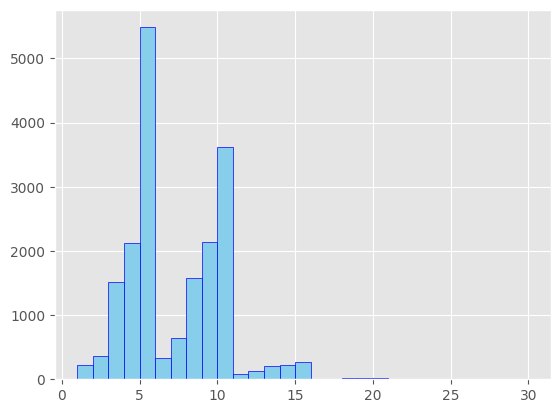

In [7]:
# Histogram: Distribution of the numeric values in num_list.
def question_hist(num_list, bin_width):
    binwidth = bin_width
    plt.hist(num_list, 
             bins = range(min(num_list),
                         max(num_list)+binwidth,
                         binwidth),
            color = 'skyblue', ec='blue')
    plt.show()
    
question_hist(num_list, 1)

In [9]:
#How many are "impossible"
def count_impossible(data):
    count = 0
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(questions):
                if data['data'][i]['paragraphs'][j]['qas'][k]['is_impossible'] == True:
                    count += 1
    return(count)


Number Impossible 43498
Number Possible 86821


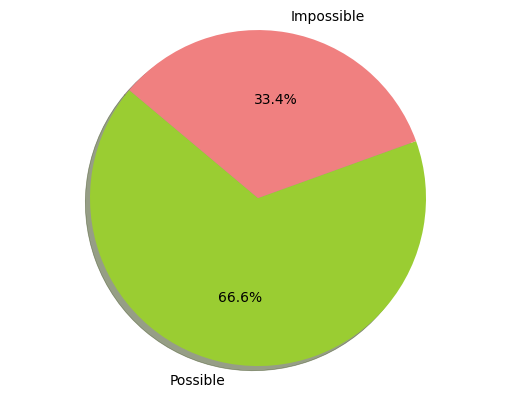

In [10]:
#Count number possible/impossible
num_impossible = count_impossible(train_data)
num_possible = num_questions-num_impossible

print('Number Impossible', num_impossible)
print('Number Possible', num_possible)

def pie_possible(possible, impossible):
    labels = ['Possible','Impossible']
    sizes = [possible, impossible]
    colors = ['yellowgreen', 'lightcoral']
    plt.pie(sizes, labels = labels, colors = colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
pie_possible(num_possible, num_impossible)

In [11]:
#How long are the contexts
def context_length(data):
    lengths = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            length = len(data['data'][i]['paragraphs'][j]['context'])
            lengths.append(length)
    print('Total Context Chars', sum(lengths))
    print('Average Context Length', round((sum(lengths)/len(lengths)),2))
    return lengths

context_lengths = context_length(train_data)
print('Shortest Context', min(context_lengths))
print('Longest Context', max(context_lengths))

Total Context Chars 14001154
Average Context Length 735.55
Shortest Context 151
Longest Context 3706


In [12]:
#Take a look at the longest context to get an idea. 

def longest_context(data):
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            length = len(data['data'][i]['paragraphs'][j]['context'])
            if length == max(context_lengths):
                print(data['data'][i]['paragraphs'][j]['context'])
                
longest_context(train_data)

The sky is usually clear above the desert and the sunshine duration is extremely high everywhere in the Sahara. Most of the desert enjoys more than 3,600 h of bright sunshine annually or over 82% of the time and a wide area in the eastern part experiences in excess of 4,000 h of bright sunshine a year or over 91% of the time, and the highest values are very close to the theoretical maximum value. A value of 4,300 h or 98% of the time would be recorded in Upper Egypt (Aswan, Luxor) and in the Nubian Desert (Wadi Halfa). The annual average direct solar irradiation is around 2,800 kWh/(m2 year) in the Great Desert. The Sahara has a huge potential for solar energy production. The constantly high position of the sun, the extremely low relative humidity, the lack of vegetation and rainfall make the Great Desert the hottest continuously large area worldwide and certainly the hottest place on Earth during summertime in some spots. The average high temperature exceeds 38 °C (100.4 °F) - 40 °C (

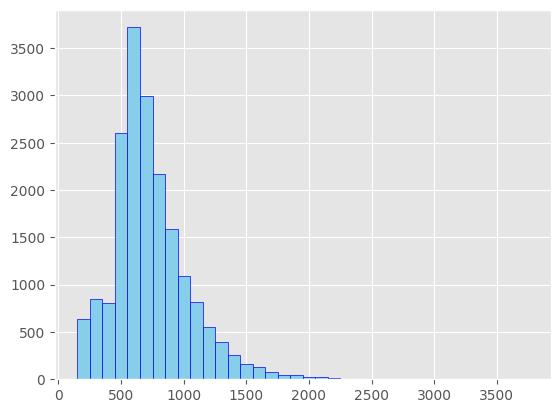

In [13]:
# Histogram for the lengths of context
def context_hist(context_lengths, bin_width):
    binwidth = bin_width
    plt.hist(context_lengths, 
             bins = range(min(context_lengths),
                         max(context_lengths)+binwidth,
                         binwidth),
            color = 'skyblue', ec='blue')
    plt.show()
    
context_hist(context_lengths, 100)

In [14]:
# Question LENGTH
# Look at the length of the answers
# get a hist of the length of the answers
# take a look at the longest/shortest answer

def question_length(data):
    lengths = []
    short_indexes = []
    long_indexes = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            qas = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(qas):
                length=(len(data['data'][i]['paragraphs'][j]['qas'][k]['question']))
                if length < 5:
                    short_indexes.append([i,j,k])
                if length > 500:
                    long_indexes.append([i,j,k])
                    
                lengths.append(length)
    print('Average Question Length', round((sum(lengths)/len(lengths)),2))
    return lengths, short_indexes, long_indexes

q_length, short_qs, long_qs = question_length(train_data)
print('Shortest Question (characters)', min(q_length))
print('Shortest Question (characters)', max(q_length))

Average Question Length 58.51
Shortest Question (characters) 1
Shortest Question (characters) 25651


In [22]:
# CHARACTER/WORD TYPE
# go to word or char in context and see how many are numbers, letters, 
# or special characters.
def character_type(data):
    numbers = 0
    letters = 0
    spaces = 0
    upper_case = 0
    total = 0
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            context = data['data'][i]['paragraphs'][j]['context']
            numbers += sum(c.isdigit() for c in context)
            letters += sum(c.isalpha() for c in context)
            spaces += sum(c.isspace() for c in context)
            upper_case += sum(c.isupper() for c in context)
            total += len(context)
    special = (total - (numbers + letters + spaces))
    print("Total Numbers:", numbers)
    print("Total Letters:", letters)
    print("Total Special:", special)
    return numbers, letters, spaces, total, special, upper_case

num, let, space, tot, spec, upper = character_type(train_data)

# make a pie chart showing the breakdown of num/letters/other
# (exclude the long outlier)


Total Numbers: 198415
Total Letters: 11218808
Total Special: 383530


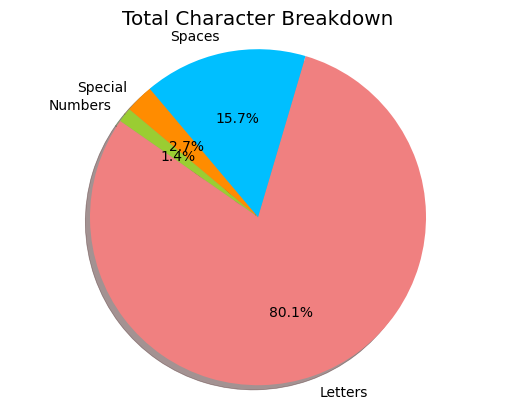

Percent Uppercased: 4.04%


In [23]:
# Show pie chart with results for the character break down

def pie_characters(numbers, letters, spaces, special, title):
    labels = ['Numbers','Letters', "Spaces", "Special"]
    sizes = [numbers, letters, spaces, special]
    colors = ['yellowgreen', 'lightcoral', 'deepskyblue', 'darkorange']
    plt.pie(sizes, labels = labels, colors = colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()
    
pie_characters(num, let, space, spec, "Total Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(upper/let))

In [25]:
# COMPARE ANSWER TEXT
# Look at the answers, does the answer text follow the same trends as the context?

def question_chars(data, q_or_a):
    numbers = 0
    letters = 0
    spaces = 0
    upper_case = 0
    total = 0
    impossible_index = []
    for i in range(len(data['data'])):
        paragraphs = len(data['data'][i]['paragraphs'])
        for j in range(paragraphs):
            questions = len(data['data'][i]['paragraphs'][j]['qas'])
            for k in range(questions):
                if q_or_a == 'question':           
                    context = data['data'][i]['paragraphs'][j]['qas'][k]['question'] 
                elif q_or_a == 'answer':
                    if data['data'][i]['paragraphs'][j]['qas'][k]['is_impossible'] == True:
                        impossible_index.append([i,j,k])
                    else:
                        context = data['data'][i]['paragraphs'][j]['qas'][k]['answers'][0]['text']
                else:
                    print("invalid entry! Please input question or answer")
                numbers += sum(c.isdigit() for c in context)
                letters += sum(c.isalpha() for c in context)
                spaces += sum(c.isspace() for c in context)
                upper_case += sum(c.isupper() for c in context)
                total += len(context)
    special = (total - (numbers + letters + spaces))
    print("\nTotal Numbers:", numbers)
    print("Total Letters:", letters)
    print("Total Special:", special)
    return numbers, letters, spaces, total, special, upper_case, impossible_index

q_num, q_let, q_space, q_total, q_spec, q_upp, q_imp = question_chars(train_data, 'question')
a_num, a_let, a_space, a_total, a_spec, a_upp, q_imp = question_chars(train_data, 'answer')



Total Numbers: 61892
Total Letters: 6201158
Total Special: 169974

Total Numbers: 102137
Total Letters: 2322815
Total Special: 47112


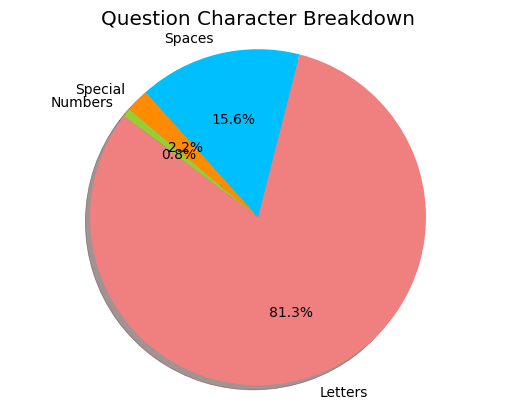

Percent Uppercased: 5.26%


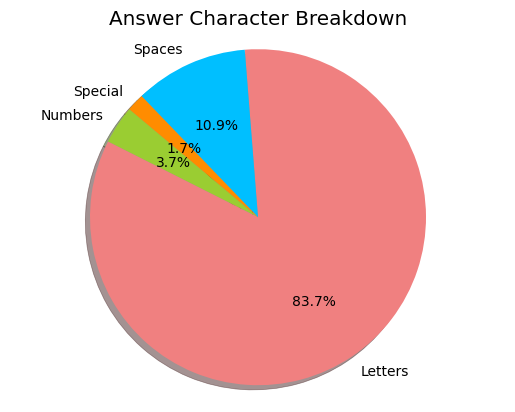

Percent Uppercased: 6.24%


In [26]:
pie_characters(q_num, q_let, q_space, q_spec, "Question Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(q_upp/q_let))

pie_characters(a_num, a_let, a_space, a_spec, "Answer Character Breakdown")
print("Percent Uppercased:", "{:.2%}".format(a_upp/a_let))

In [ ]:
# We see that numbers are very rare in questions, but very common in questions.
# they occur more than twice as often in answers as they do in context.

# We also see that upper cases letters are much more common in both questions
# and answers than they are in the overall context.  This suggests I would be best
# off using the Cased verison of BERT. 

In [27]:
#Take a look at some of the impossible examples.

for _ in range(5):
    example = random.choice(q_imp)
    print('\nIndexes:', example)
    print('\nConext:', train_data['data'][example[0]]['paragraphs'][example[1]]['context'])
    print("\nImpossible Question:", train_data['data'][example[0]]['paragraphs'][example[1]]['qas'][example[2]]['question'])
    


Indexes: [238, 18, 6]

Conext: In 1610, all but three of the survivors of the Sea Venture sailed on to Jamestown. Among them was John Rolfe, whose wife and child died and were buried in Bermuda. Later in Jamestown he married Pocahontas, a daughter of the powerful Powhatan, leader of a large confederation of about 30 Algonquian-speaking tribes in coastal Virginia. In 1612, the English began intentional settlement of Bermuda with the arrival of the ship Plough. St. George's was settled that year and designated as Bermuda's first capital. It is the oldest continually inhabited English town in the New World.

Impossible Question: Who did Rolfe John marry?

Indexes: [400, 11, 8]

Conext: The celebrated John Duns Scotus (d. 1308), a Friar Minor like Saint Bonaventure, argued, on the contrary, that from a rational point of view it was certainly as little derogatory to the merits of Christ to assert that Mary was by him preserved from all taint of sin, as to say that she first contracted it a